# Homework 7 writeup solutions

## Name: Zach Gendreau

## Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.integrate

### Part a - Timing RK45 and BDF

In [21]:
# Define the 10 logarithmically spaced points
qs = np.logspace(0, -5, 10)

s = 77.27
w = 0.161
q = 1
y1_prime = lambda y1, y2, y3: s*(y2 - y1*y2 + y1 - q*y1**2)
y2_prime = lambda y1, y2, y3: (1/s)*(-y2-y1*y2+y3)
y3_prime = lambda y1, y2, y3: w*(y1-y3)
odefun = lambda t, y: [y1_prime(*y), y2_prime(*y), y3_prime(*y)]

## (b) Solve for 10 logarithmically spaced points, using RK45
rk = np.zeros([3, 10])
rk_q_times = np.zeros(len(qs))

for k in range(len(qs)):
    start_time = time.time()
    q = qs[k]
    sol = scipy.integrate.solve_ivp(odefun, [0, 30], [1,2,3])
    end_time = time.time()
    rk_q_times[k] = end_time - start_time


bdf = np.zeros([3, 10])
bdf_q_times = np.zeros(len(qs))

for k in range(len(qs)):
    start_time = time.time()
    q = qs[k]
    sol = scipy.integrate.solve_ivp(odefun, 
                            [0, 30],
                            [1,2,3], method='BDF')
    end_time = time.time()
    bdf_q_times[k] = end_time - start_time



### Part b - Create a loglog plot
Make sure to use plot *markers* not lines for the data, and label the axes! 

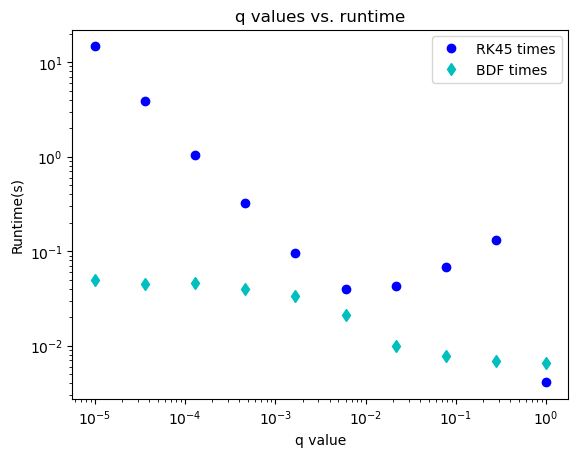

In [22]:
plt.figure()
plt.loglog(qs,rk_q_times, 'bo',label = "RK45 times")
plt.loglog(qs,bdf_q_times, 'cd',label = "BDF times")
plt.title("q values vs. runtime")
plt.xlabel("q value")
plt.ylabel("Runtime(s)")
plt.legend(loc="upper right")

### Part c - Create a 2 panel figure.


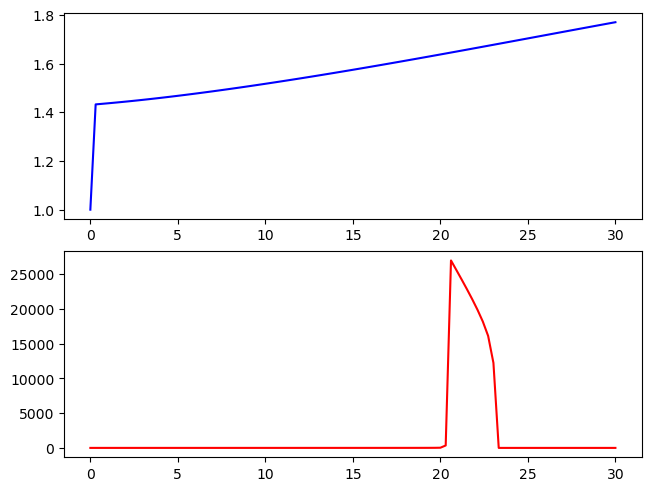

In [69]:
# You can delete this once you've figured it out,
# I just want to give the example.
fig, ax = plt.subplots(2, 1, constrained_layout=True)
tspan = np.linspace(0,30,100)
ys_1 = np.zeros(len(tspan))
q = qs[1]
sol = scipy.integrate.solve_ivp(odefun, 
                        [0, 30],
                        [1,2,3], method='BDF',
                               t_eval=tspan)
ys_1 = sol.y[0,:]


ys_2 = np.zeros(len(tspan))
q = qs[-2]
sol = scipy.integrate.solve_ivp(odefun, 
                        [0, 30],
                        [1,2,3], method='BDF',
                               t_eval=tspan)
ys_2 = sol.y[0,:]

    
    
ax[0].plot(tspan, ys_1, 'b') 
ax[1].plot(tspan, ys_2, 'r') 

## Problem 2

### Part a - Ratio of points, RK45 to BDF.

#### Part b - Plot solution, x(t)

##### Part c - Plot x(t) vs. y(t) (y(t) on vertical axis)

##### Part d - Discussion